In [ ]:
import pandas as pd  # Dataframes
import numpy as np  # For Arrays Manipulation
import cv2  # Python Image Processing Library
import matplotlib.pyplot as plt  # For ploting images and graphs

from glob import glob

from IPython.display import HTML; from base64 import b64encode

import IPython.display as ipd
from tqdm.notebook import tqdm

import subprocess

In [ ]:
from google.colab import drive # Linking the Google Drive to my Colab Notebook to get video data I am using
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
video_path = "/content/drive/MyDrive/Colab Notebooks/DIP_BSCS_SEM06_KIU/026c7465-309f6d33.mp4" # Importing the video saved in Google Drive into Colab Notebook

# Diplaying the Video I have used:


In [ ]:
HTML(f'<video width=640 height=480 controls><source src="data:video/mp4;base64,{b64encode(open("/content/drive/MyDrive/Colab Notebooks/DIP_BSCS_SEM06_KIU/026c7465-309f6d33.mp4", "rb").read()).decode()}" type="video/mp4">Your browser does not support the video tag.</video>')

Output hidden; open in https://colab.research.google.com to view.

# Opening the video and reading the metadata

In [ ]:
# Opening the video and reading the metadata

In [ ]:
# Loading the video capture
capture = cv2.VideoCapture(video_path)

In [ ]:
# Shows us the number of Frames in the video
capture.get(cv2.CAP_PROP_FRAME_COUNT)

2398.0

In [ ]:
# Shows us the number of Vertical and Horizontal pixels in the video or the height and width of each frame
height = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 720.0, Width 1280.0


In [ ]:
fps = capture.get(cv2.CAP_PROP_FPS)
print(f'Frames per secong {fps}')

Frames per secong 59.94005994005994


In [ ]:
capture.release() # we release the capture once we are done using the video file

In [ ]:
capture = cv2.VideoCapture(video_path) # Creating video object to open the specified video file for reading.

In [ ]:
ret, img = capture.read() # This function returns 2 values
print(f'Returned {ret} and image of the shape {img.shape}')


Returned True and image of the shape (720, 1280, 3)


In [ ]:
img.shape # img is a numpy array of 3 dimesions

(720, 1280, 3)

In [ ]:
# Function for plotting cv2 images in the Colab Notebook by channel sequence
def display_cv2_img(img, figsize=(10, 10)):
  img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  fig, ax = plt.subplots(figsize=figsize)
  ax.imshow(img_)
  ax.axis("off")

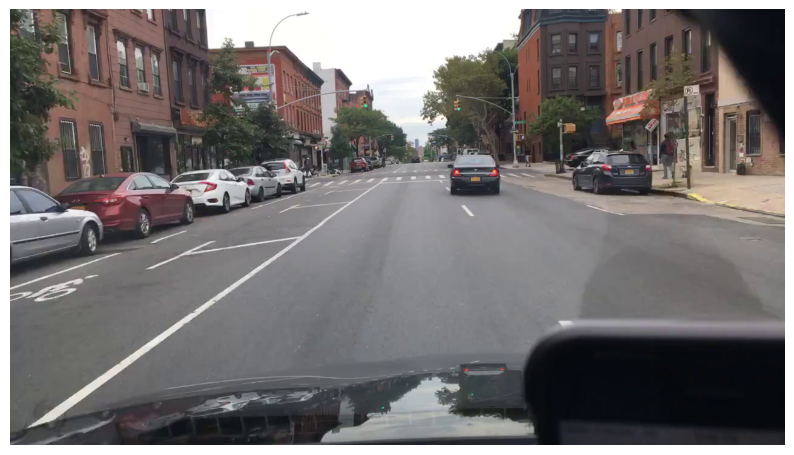

In [ ]:
display_cv2_img(img)

In [ ]:
capture.release()

# Displaying multiple frames from the video

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

capture = cv2.VideoCapture(video_path) # using the path variable in which we saved the path to the video in out Google Drive
no_of_frames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(no_of_frames):
    ret, img = capture.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
capture.release()

Output hidden; open in https://colab.research.google.com to view.

# Add Annotations to Video Images

In [ ]:
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DIP_BSCS_SEM06_KIU/labels.csv",
                     low_memory=False)
video_labels = (
    labels.query('videoName == "026c7465-309f6d33"').reset_index(drop=True).copy()
)

video_labels["video_frame"] = (video_labels["frameIndex"] * 11.9).round().astype("int") # Aligning the video frame rate with the actual frame rate of video labels

In [ ]:
video_labels["category"].value_counts()

car              3030
pedestrian        847
bicycle           381
rider             320
truck             194
other vehicle     115
bus               109
other person       74
motorcycle         67
trailer            34
Name: category, dtype: int64

In [ ]:
capture = cv2.VideoCapture(video_path) # Pulling the frame 1035
no_of_frames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(no_of_frames):
    ret, img = capture.read()
    if ret == False:
        break
    if frame == 1035:
        break
capture.release()

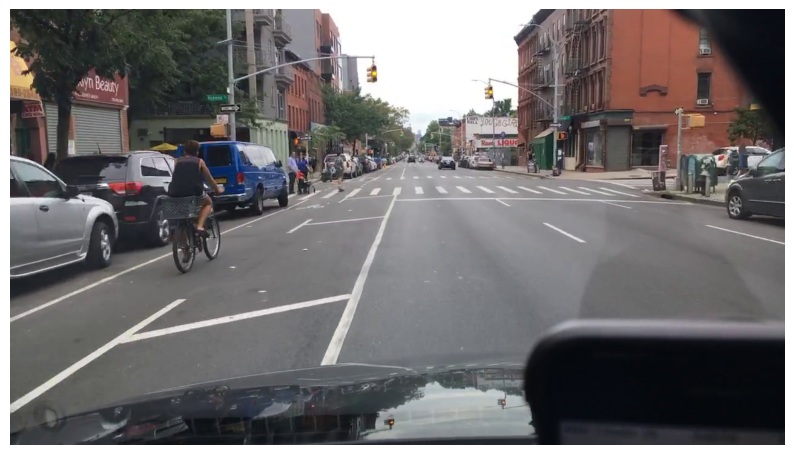

In [ ]:
display_cv2_img(img)

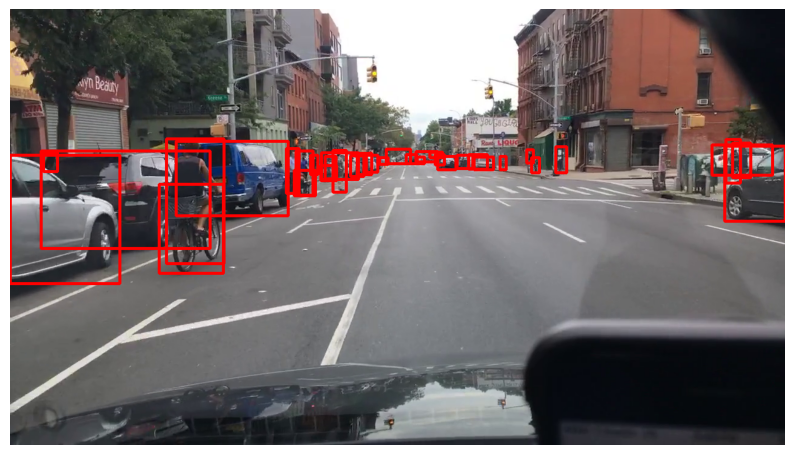

In [ ]:
img = img.copy()
frame_labels = video_labels.query('video_frame == 1035')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 3)

display_cv2_img(img)

# Displaying Colored by Category



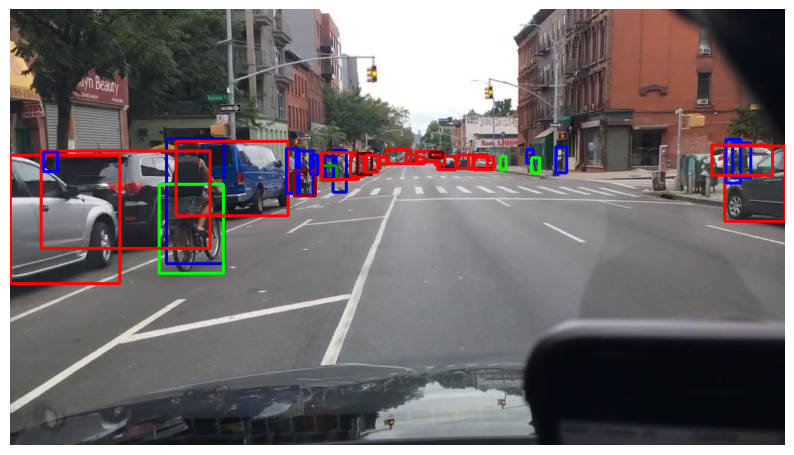

In [ ]:
color_map = {
    "car": (0, 0, 255),
    "truck": (0, 0, 100),
    "pedestrian": (255, 0, 0),
    "other vehicle": (0, 0, 150),
    "rider": (200, 0, 0),
    "bicycle": (0, 255, 0),
    "other person": (200, 0, 0),
    "trailer": (0, 150, 150),
    "motorcycle": (0, 150, 0),
    "bus": (0, 0, 100),
}

img = img.copy()
frame_labels = video_labels.query('video_frame == 1035')
for i, d in frame_labels.iterrows():
    pt1 = int(d['box2d.x1']), int(d['box2d.y1'])
    pt2 = int(d['box2d.x2']), int(d['box2d.y2'])
    color = color_map[d['category']]
    cv2.rectangle(img, pt1, pt2, color, 3)

display_cv2_img(img)

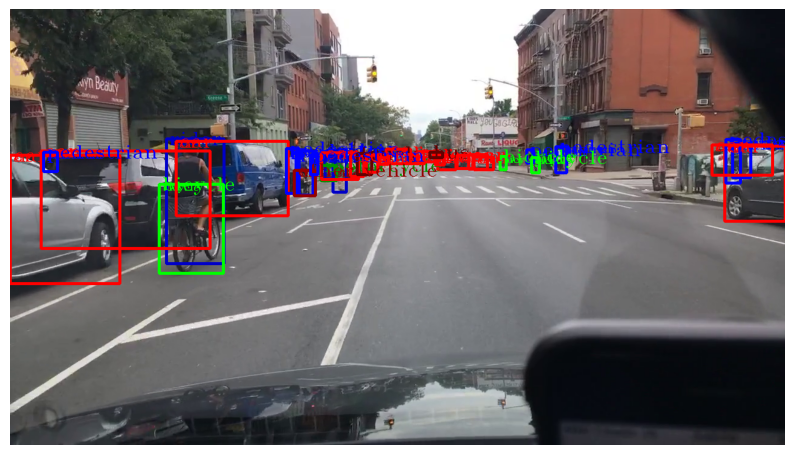

In [ ]:
frame_labels = video_labels.query("video_frame == 1035")
font = cv2.FONT_HERSHEY_TRIPLEX
img = img.copy()
for i, d in frame_labels.iterrows():
    pt1 = int(d["box2d.x1"]), int(d["box2d.y1"])
    pt2 = int(d["box2d.x2"]), int(d["box2d.y2"])
    color = color_map[d["category"]]
    img = cv2.rectangle(img, pt1, pt2, color, 3)
    pt_text = int(d["box2d.x1"]) + 5, int(d["box2d.y1"] + 10)
    img = cv2.putText(img, d["category"], pt_text, font, 1, color)
display_cv2_img(img)
capture.release()